In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml
import json
import pandas as pd
import numpy as np
import sys
sys.path.append("../lib")
from benchmark import *

In [2]:
CONFIG = "../config/experiment_v01.yaml"
with open(CONFIG, "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
BENCHMARKS = config["benchmarks_configurations"]
DETECTORS = config["detectors"]

In [4]:
detector_result = {}
ground_truth = []
program_info = []
execution_info = []

for benchmark in BENCHMARKS:
    print("BENCHMARK: ", benchmark["name"])
    
    print("GROUND TRUTH - reading ...  ")
    ground_truth_folder = get_benchmark_folder(config, benchmark["name"], "ground_truth")
    _, records_ground_truth = zip(*list(
        iterate_over(ground_truth_folder, ".json", parse_json=True)))
    print(records_ground_truth)
    ground_truth.extend(records_ground_truth)
    
    print("PROGRAM INFO - reading ...  ")
    folder_a = get_benchmark_folder(config, benchmark["name"], "programs", "sample_a")
    folder_b = get_benchmark_folder(config, benchmark["name"], "programs", "sample_b")
    pairs_program_info = list(
        iterate_parallel(folder_a, folder_b, ".json", parse_json=True))
    records_program_info = [ 
        {
            "n_qubits": program_a["n_qubits"],
            "circuit_id": program_a["circuit_id"],
            "benchmark_name": program_a["benchmark_name"],
            "strategy_a": program_a["strategy_program_generation"],
            "strategy_b": program_b["strategy_program_generation"],
        }
        for _, program_a, program_b in pairs_program_info
    ] 
    print(records_program_info)
    program_info.extend(records_program_info)
    
    print("EXECUTION INFO - reading ...  ")
    folder_a = get_benchmark_folder(config, benchmark["name"], "executions", "sample_a")
    folder_b = get_benchmark_folder(config, benchmark["name"], "executions", "sample_b")
    pairs_execution_info = list(
        iterate_parallel(folder_a, folder_b, ".json", parse_json=True))
    records_execution_info = [ 
        {
            "circuit_id": circuit_id,
            "benchmark_name": benchmark["name"],
            "execution_a": res_a,
            "execution_b": res_b,
        }
        for circuit_id, res_a, res_b in pairs_execution_info
    ] 
    #print(records_execution_info)
    execution_info.extend(records_execution_info)
    
    
    
    for detector in DETECTORS:
        old_detector_predictions = detector_result.get(detector["name"], [])
        #print("DETECTOR: ", detector["name"])
        # READ PREDICTIONS
        pred_folder = get_benchmark_folder(config, benchmark["name"], "predictions")
        detector_prediction_folder = os.path.join(pred_folder, detector["name"])
        _, records_predictions = zip(*list(
            iterate_over(detector_prediction_folder, ".json", parse_json=True)))
        #print(records_predictions)
        old_detector_predictions.extend(records_predictions)
        detector_result[detector["name"]] = old_detector_predictions
        

BENCHMARK:  program_vs_random
GROUND TRUTH - reading ...  
({'expected_divergence': True, 'circuit_id': '715', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '115', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '101', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '516', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '652', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '376', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '795', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '343', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '769', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 'circuit_id': '480', 'benchmark_name': 'program_vs_random'}, {'expected_divergence': True, 

[{'n_qubits': 18, 'circuit_id': '715', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 15, 'circuit_id': '115', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '101', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 20, 'circuit_id': '516', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 5, 'circuit_id': '652', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '376', 'benchmark_name': 'program_vs_random', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'FakeCircuitGenerator'}, {'n_qubits': 8, 'c

BENCHMARK:  famous_algos
GROUND TRUTH - reading ...  
({'expected_divergence': False, 'circuit_id': '715', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '115', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '101', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '516', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '652', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '376', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '795', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '343', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '769', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '480', 'benchmark_name': 'famous_algos'}, {'expected_divergence': False, 'circuit_id': '925', 'benchmark_name': 'famo

({'expected_divergence': False, 'circuit_id': '715', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '115', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '101', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '516', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '652', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '376', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '795', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '343', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '769', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '480', 'benchmark_name': 'across_runs_cirq'}, {'expected_divergence': False, 'circuit_id': '925', 'benchmark_name': 'across_runs_cirq'}

[{'n_qubits': 18, 'circuit_id': '715', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 15, 'circuit_id': '115', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '101', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 20, 'circuit_id': '516', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 5, 'circuit_id': '652', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '376', 'benchmark_name': 'across_runs_cirq', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b':

BENCHMARK:  across_runs_qiskit
GROUND TRUTH - reading ...  
({'expected_divergence': False, 'circuit_id': '715', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '115', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '101', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '516', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '652', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '376', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '795', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '343', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '769', 'benchmark_name': 'across_runs_qiskit'}, {'expected_divergence': False, 'circuit_id': '480', 'benchmark_name': 'across_runs_qiskit'}, {'expecte

[{'n_qubits': 18, 'circuit_id': '715', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 15, 'circuit_id': '115', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '101', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 20, 'circuit_id': '516', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 5, 'circuit_id': '652', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '376', 'benchmark_name': 'across_runs_qiskit', 'strategy_a': 'WeightedRandomCircuitGenerator', '

BENCHMARK:  negation
GROUND TRUTH - reading ...  
({'expected_divergence': True, 'circuit_id': '715', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '115', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '101', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '516', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '652', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '376', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '795', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '343', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '769', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '480', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '925', 'benchmark_name': 'negation'}, {'expected_divergence': True, 'circuit_id': '56

[{'n_qubits': 18, 'circuit_id': '715', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 15, 'circuit_id': '115', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '101', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 20, 'circuit_id': '516', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 5, 'circuit_id': '652', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 9, 'circuit_id': '376', 'benchmark_name': 'negation', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits':

BENCHMARK:  program_x_vs_program_y
GROUND TRUTH - reading ...  
({'expected_divergence': True, 'circuit_id': '715', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '115', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '101', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '516', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '652', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '376', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '795', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '343', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '769', 'benchmark_name': 'program_x_vs_program_y'}, {'expected_divergence': True, 'circuit_id': '480', 'benchmark_name': 'p

[{'n_qubits': 2, 'circuit_id': '715', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 4, 'circuit_id': '115', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 4, 'circuit_id': '101', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 7, 'circuit_id': '516', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 5, 'circuit_id': '652', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRandomCircuitGenerator', 'strategy_b': 'WeightedRandomCircuitGenerator'}, {'n_qubits': 10, 'circuit_id': '376', 'benchmark_name': 'program_x_vs_program_y', 'strategy_a': 'WeightedRand

In [5]:
detector_result.keys()

dict_keys(['ks'])

In [6]:
df_truth = pd.DataFrame.from_records(ground_truth)
df_truth.head(3)

,expected_divergence,circuit_id,benchmark_name
0,True,715,program_vs_random
1,True,115,program_vs_random
2,True,101,program_vs_random


In [7]:
df_execution_info = pd.DataFrame.from_records(execution_info)
df_execution_info.head(3)

,circuit_id,benchmark_name,execution_a,execution_b
0,715,program_vs_random,"{'001010010011000111': 18, '001101111000010101...","{'111001100000000010': 1, '001111101011110101'..."
1,115,program_vs_random,"{'011110010101000': 2, '001000011101011': 9, '...","{'111110111011111': 1, '110111010011101': 1, '..."
2,101,program_vs_random,"{'000001010': 2372, '010001000': 1603, '000101...","{'001111010': 11, '011010001': 17, '011110001'..."


In [8]:
df_program_info = pd.DataFrame.from_records(program_info)
df_program_info.head(3)

,n_qubits,circuit_id,benchmark_name,strategy_a,strategy_b
0,18,715,program_vs_random,WeightedRandomCircuitGenerator,FakeCircuitGenerator
1,15,115,program_vs_random,WeightedRandomCircuitGenerator,FakeCircuitGenerator
2,9,101,program_vs_random,WeightedRandomCircuitGenerator,FakeCircuitGenerator


In [9]:
TEST_TO_INSPECT = 'ks' # ks | energy
df_single_test = pd.DataFrame.from_records(detector_result[TEST_TO_INSPECT])
df_single_test.head(3)

,test,test_long_name,circuit_id,benchmark_name,random_seed,statistic,p_value
0,ks,Kolmogorov–Smirnov Test,715,program_vs_random,None,0.612427,0.000000e+00
1,ks,Kolmogorov–Smirnov Test,115,program_vs_random,None,0.091797,1.908661e-30
2,ks,Kolmogorov–Smirnov Test,101,program_vs_random,None,0.519531,0.000000e+00


In [10]:
from sklearn.metrics import RocCurveDisplay 
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches




class Analyzer(object):
    
    def __init__(self, detector_name, df_detector, df_ground_truth, df_program_info, df_execution_info):
        # derive the column label form the ground truth
        df_ground_truth = self._create_label(df_ground_truth)
        # derive the output size
        df_execution_info = self._measure_output_size(df_execution_info)
        
        
        self.detector_name = detector_name
        self.df_detector = df_detector
        self.df_ground_truth = df_ground_truth
        self.df_program_info = program_info
        self.df_execution_info = df_execution_info
        self.df_all = pd.merge(df_detector, df_ground_truth, on=["circuit_id", "benchmark_name"])
        self.df_all = pd.merge(self.df_all, df_program_info, on=["circuit_id", "benchmark_name"])
        self.df_all = pd.merge(self.df_all, df_execution_info, on=["circuit_id", "benchmark_name"])
        
        # measure coverage (relative output size)
        self.df_all = self._measure_output_coverage(self.df_all)
        
    # START SECTION: internal manipulation to enrich with new columns  
        
    def _create_label(self, df_ground_truth):
        df_ground_truth["label"] = df_ground_truth["expected_divergence"].apply(
            lambda e: 1 if e else 0)
        return df_ground_truth
    
    def _measure_output_size(self, df_execution_info):
        df_execution_info["output_size_a"] = df_execution_info["execution_a"].apply(
            lambda e: len(e))
        df_execution_info["output_size_b"] = df_execution_info["execution_b"].apply(
            lambda e: len(e))
        return df_execution_info
        
    def _measure_output_coverage(self, df_all):
        df_all["output_size_total"] = df_all["n_qubits"].apply(
            lambda e: 2**e)
        df_all["output_coverage_a"] = df_all.apply(
            lambda row: round(row["output_size_a"] / row["output_size_total"], 6), axis=1
        )
        df_all["output_coverage_b"] = df_all.apply(
            lambda row: round(row["output_size_a"] / row["output_size_total"], 6), axis=1
        )
        return df_all
    
     # END SECTION
        
    def plot_ROC(self, prediction_column="p_value"):
        RocCurveDisplay.from_predictions(self.df_all["label"], self.df_all[prediction_column])
        
    def classify_based_on_pvalue(self, treshold=0.05):
        self.df_all["prediction_divergence"] = self.df_all["p_value"].apply(lambda e: e < treshold)
        self.df_all["correct_prediction"] = self.df_all.apply(
            lambda row: row["prediction_divergence"] == row["expected_divergence"],
            axis=1
        )
        
    def plot_benchmark_categories(self):
        
        df = self.df_all
        
        # set the figure size
        fig, ax = plt.subplots(figsize=(7, 3))

        # from raw value to percentage
        total = df.groupby('benchmark_name')['correct_prediction'].count().reset_index()
        correct = df[df["correct_prediction"]].groupby('benchmark_name')['correct_prediction'].count().reset_index()
        
        difference = set(total["benchmark_name"]).difference(set(correct["benchmark_name"]))
        if len(difference) > 0:
            for missing_bench in list(difference):
                new_row = {'benchmark_name':missing_bench, 'correct_prediction':0, 'samples':0}
                #append row to the dataframe
                correct = correct.append(new_row, ignore_index=True)
        
        correct['samples'] = [i / j * 100 for i,j in zip(correct['correct_prediction'], total['correct_prediction'])]
        total['samples'] = [i / j * 100 for i,j in zip(total['correct_prediction'], total['correct_prediction'])]
        
        # bar chart 1 -> top bars (group of 'smoker=No')
        sns.barplot(y="benchmark_name",  x="samples", data=total, color='orange', ax=ax)


        # bar chart 2 -> bottom bars (group of 'smoker=Yes')
        sns.barplot(y="benchmark_name", x="samples", data=correct, color='blue', ax=ax)
        
        # add legend
        top_bar = mpatches.Patch(color='orange', label='Wrong predictions')
        bottom_bar = mpatches.Patch(color='blue', label='Correct predictions')
        fig.legend(handles=[top_bar, bottom_bar])
        
        ax.set_xlabel("% of samples")
        ax.set_ylabel("Benchmark Name")
        ax.set_xlim(0,100)
        ax.set_title(f"Test: {self.detector_name}")
        
        # show the graph
        fig.show()
        
    def inspect_mispredictions(self, variable_to_inspect="n_qubits", benchmark_name=None):
        mispredictions = self.df_all[~self.df_all["correct_prediction"]]
        self.inspect(variable_to_inspect, benchmark_name, mispredictions, "Mispredictions")
        
    def inspect(self, variable_to_inspect="n_qubits", benchmark_name=None, df=None, title=None):
        if df is None:
            df = self.df_all
        if benchmark_name is not None:
            if isinstance(benchmark_name, list):
                df = df[df["benchmark_name"].isin(benchmark_name)]
            else:
                df = df[df["benchmark_name"] == benchmark_name]
        df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)
        tot = len(self.df_all)
        try:
            ax = sns.histplot(data=df, x=variable_to_inspect)
            if title is None:
                ax.set_title(f"{len(df)}/{tot} - {benchmark_name}")
            else:
                ax.set_title(title)
        except ValueError:
            print("Scale of the data was too small or too big to plot.")
            print("Raw data: ", sorted(df[variable_to_inspect]))
        print(f"We have displayed {len(df)}/{tot} datapoints.")
        print(f"[resticted to: {benchmark_name}")
        
    def get_mispredictions(self):
        return self.df_all[~self.df_all["correct_prediction"]]

In [11]:
analyzer = Analyzer(TEST_TO_INSPECT, df_single_test, df_truth, df_program_info, df_execution_info)
analyzer.classify_based_on_pvalue(treshold=0.05)

In [12]:
analyzer.df_all.head()

,test,test_long_name,circuit_id,benchmark_name,random_seed,statistic,p_value,expected_divergence,label,n_qubits,...,strategy_b,execution_a,execution_b,output_size_a,output_size_b,output_size_total,output_coverage_a,output_coverage_b,prediction_divergence,correct_prediction
0,ks,Kolmogorov–Smirnov Test,715,program_vs_random,None,0.612427,0.000000e+00,True,1,18,...,FakeCircuitGenerator,"{'001010010011000111': 18, '001101111000010101...","{'111001100000000010': 1, '001111101011110101'...",1796,8045,262144,0.006851,0.006851,True,True
1,ks,Kolmogorov–Smirnov Test,115,program_vs_random,None,0.091797,1.908661e-30,True,1,15,...,FakeCircuitGenerator,"{'011110010101000': 2, '001000011101011': 9, '...","{'111110111011111': 1, '110111010011101': 1, '...",3674,7234,32768,0.112122,0.112122,True,True
2,ks,Kolmogorov–Smirnov Test,101,program_vs_random,None,0.519531,0.000000e+00,True,1,9,...,FakeCircuitGenerator,"{'000001010': 2372, '010001000': 1603, '000101...","{'001111010': 11, '011010001': 17, '011110001'...",79,512,512,0.154297,0.154297,True,True
3,ks,Kolmogorov–Smirnov Test,516,program_vs_random,None,0.113037,5.596123e-46,True,1,20,...,FakeCircuitGenerator,"{'11001111110101111000': 9, '00010101001100001...","{'00011010100111110011': 1, '01000111101100100...",3489,8154,1048576,0.003327,0.003327,True,True
4,ks,Kolmogorov–Smirnov Test,652,program_vs_random,None,0.310669,9.881313e-324,True,1,5,...,FakeCircuitGenerator,"{'00001': 2765, '00000': 318, '11100': 1022, '...","{'11010': 265, '11111': 236, '00100': 277, '11...",32,32,32,1.000000,1.000000,True,True


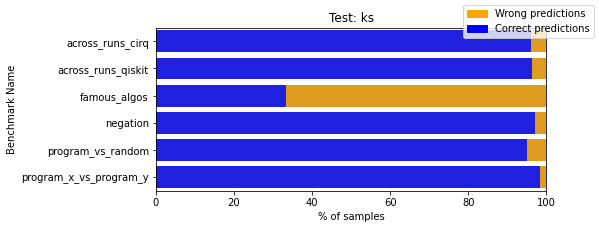

In [13]:
# see performance of the selected test to inspect
analyzer.plot_benchmark_categories()

In [15]:
sum(analyzer.df_all["correct_prediction"])

4834

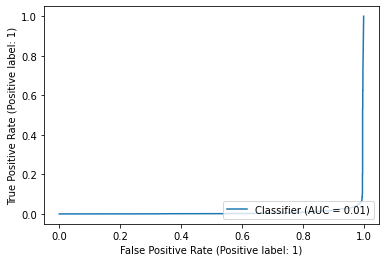

In [16]:
analyzer.plot_ROC()

## Inspect Wrong Predictions

We have displayed 178/5012 datapoints.
[resticted to: None


/tmp/ipykernel_34167/2487802672.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)


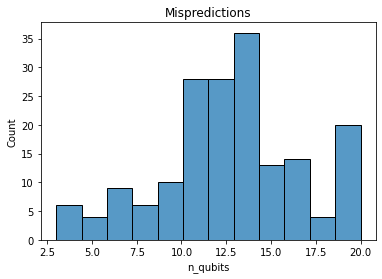

In [17]:
analyzer.inspect_mispredictions(variable_to_inspect="n_qubits")

We have displayed 178/5012 datapoints.
[resticted to: None


/tmp/ipykernel_34167/2487802672.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)


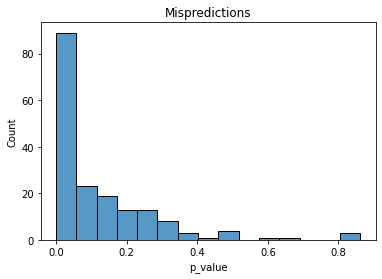

In [18]:
analyzer.inspect_mispredictions(variable_to_inspect="p_value")

We have displayed 8/5012 datapoints.
[resticted to: famous_algos


/tmp/ipykernel_34167/2487802672.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)


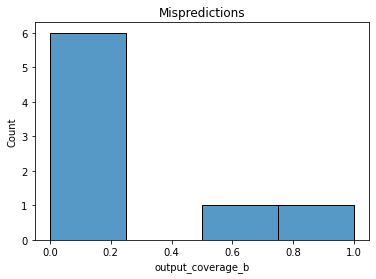

In [19]:
analyzer.inspect_mispredictions(variable_to_inspect="output_coverage_b", benchmark_name="famous_algos")

In [20]:
df_mispredictions = analyzer.get_mispredictions()
df_mispredictions.head(20)

,test,test_long_name,circuit_id,benchmark_name,random_seed,statistic,p_value,expected_divergence,label,n_qubits,...,strategy_b,execution_a,execution_b,output_size_a,output_size_b,output_size_total,output_coverage_a,output_coverage_b,prediction_divergence,correct_prediction
38,ks,Kolmogorov–Smirnov Test,172,program_vs_random,None,0.019043,0.102521,True,1,11,...,FakeCircuitGenerator,"{'01111111110': 9, '01110100001': 3, '10011011...","{'01110011010': 6, '00000011101': 7, '00001111...",1640,2008,2048,0.800781,0.800781,False,False
52,ks,Kolmogorov–Smirnov Test,878,program_vs_random,None,0.021118,0.051800,True,1,19,...,FakeCircuitGenerator,"{'0000110100000010010': 1, '010011101000111100...","{'0101000110000100010': 1, '110111111010011011...",6538,8139,524288,0.012470,0.012470,False,False
53,ks,Kolmogorov–Smirnov Test,935,program_vs_random,None,0.016602,0.208926,True,1,12,...,FakeCircuitGenerator,"{'000000000110': 4, '111110010100': 3, '110110...","{'001001100111': 2, '111011010111': 2, '001101...",2656,3539,4096,0.648438,0.648438,False,False
72,ks,Kolmogorov–Smirnov Test,435,program_vs_random,None,0.020142,0.072058,True,1,11,...,FakeCircuitGenerator,"{'01100000101': 28, '01010000110': 44, '010100...","{'10100110010': 6, '01000000011': 6, '10010111...",907,2019,2048,0.442871,0.442871,False,False
169,ks,Kolmogorov–Smirnov Test,928,program_vs_random,None,0.009888,0.818124,True,1,13,...,FakeCircuitGenerator,"{'0010101000111': 5, '0001101111011': 2, '1000...","{'0101101110001': 2, '1010110011111': 1, '1110...",3831,5172,8192,0.467651,0.467651,False,False
190,ks,Kolmogorov–Smirnov Test,931,program_vs_random,None,0.018433,0.123637,True,1,15,...,FakeCircuitGenerator,"{'001110010110111': 5, '101101011110001': 3, '...","{'110011110110100': 2, '001111111101011': 1, '...",5506,7240,32768,0.168030,0.168030,False,False
211,ks,Kolmogorov–Smirnov Test,531,program_vs_random,None,0.015625,0.270011,True,1,12,...,FakeCircuitGenerator,"{'000001111010': 3, '110101111011': 2, '000010...","{'001000100010': 3, '100111101011': 3, '111010...",2692,3504,4096,0.657227,0.657227,False,False
224,ks,Kolmogorov–Smirnov Test,51,program_vs_random,None,0.015747,0.261730,True,1,9,...,FakeCircuitGenerator,"{'010101100': 40, '101011100': 28, '111101100'...","{'100000011': 12, '101011011': 15, '100000100'...",492,512,512,0.960938,0.960938,False,False
255,ks,Kolmogorov–Smirnov Test,25,program_vs_random,None,0.015503,0.278481,True,1,11,...,FakeCircuitGenerator,"{'00000110010': 3, '11101011111': 21, '0000000...","{'01100111111': 2, '00101011000': 10, '1001010...",1617,2011,2048,0.789551,0.789551,False,False
275,ks,Kolmogorov–Smirnov Test,236,program_vs_random,None,0.013306,0.462972,True,1,12,...,FakeCircuitGenerator,"{'010011101010': 7, '101100011010': 3, '110101...","{'001000010100': 2, '100010100100': 2, '011011...",2689,3575,4096,0.656494,0.656494,False,False


# Check all data

## Are difficult programs more peaked or spread?

We have displayed 12/5012 datapoints.
[resticted to: famous_algos


/tmp/ipykernel_34167/2487802672.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)


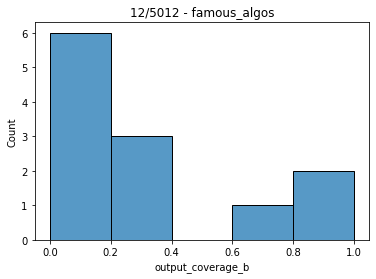

In [21]:
analyzer.inspect(variable_to_inspect="output_coverage_b", benchmark_name="famous_algos")

['program_vs_random', 'across_runs_cirq', 'across_runs_qiskit', 'negation', 'program_x_vs_program_y']
We have displayed 5000/5012 datapoints.
[resticted to: ['program_vs_random', 'across_runs_cirq', 'across_runs_qiskit', 'negation', 'program_x_vs_program_y']


/tmp/ipykernel_34167/2487802672.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable_to_inspect] = np.around(df[variable_to_inspect], decimals=6)


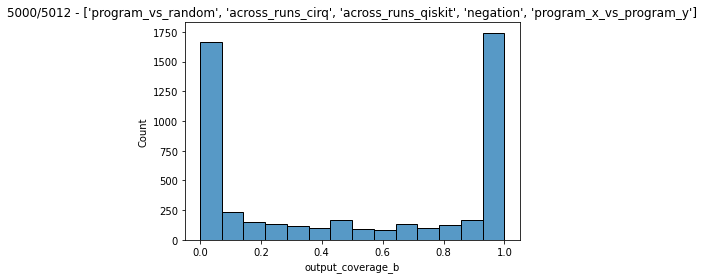

In [22]:
benchmarks_considered = list(analyzer.df_all.benchmark_name.unique())
benchmarks_considered.remove("famous_algos")
print(benchmarks_considered)
analyzer.inspect(variable_to_inspect="output_coverage_b", benchmark_name=benchmarks_considered)